In [19]:
# Reading files

apple = read.csv("../input/apple-tweets-before-after-quarterly-earnings/apple_before.csv", header = T)

In [20]:
str(apple)

'data.frame':	1000 obs. of  16 variables:
 $ text         : Factor w/ 629 levels ".@MsABalakrishnan is about to tackle Apple earnings, without Oreo fuel $AAPL https://t.co/nZThACBCpQ",..: 515 515 395 542 56 479 479 525 527 499 ...
 $ favorited    : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ favoriteCount: int  0 0 0 0 0 0 0 0 0 0 ...
 $ replyToSN    : Factor w/ 36 levels "AdamBuschbacher",..: NA NA NA NA NA NA NA NA NA NA ...
 $ created      : Factor w/ 826 levels "2017-08-01 18:37:59",..: 826 825 825 825 824 824 823 823 823 822 ...
 $ truncated    : logi  FALSE FALSE FALSE FALSE FALSE FALSE ...
 $ replyToSID   : num  NA NA NA NA NA NA NA NA NA NA ...
 $ id           : num  8.92e+17 8.92e+17 8.92e+17 8.92e+17 8.92e+17 ...
 $ replyToUID   : num  NA NA NA NA NA NA NA NA NA NA ...
 $ statusSource : Factor w/ 51 levels "<a href=\"http://127.0.0.1:3000/\" rel=\"nofollow\">Twitter tweets 111</a>",..: 14 14 7 13 7 13 14 14 11 11 ...
 $ screenName   : Factor w/ 736 levels "__v4gue__","_d

In [21]:
# Building corpus

library(tm)

corpus = iconv(apple$text, to = 'utf-8')

corpus = Corpus(VectorSource(corpus))

inspect(corpus[1:5])

<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 5

[1] RT @option_snipper: $AAPL beat on both eps and revenues. SEES 4Q REV. $49B-$52B, EST. $49.1B https://t.co/hfHXqj0IOB                        
[2] RT @option_snipper: $AAPL beat on both eps and revenues. SEES 4Q REV. $49B-$52B, EST. $49.1B https://t.co/hfHXqj0IOB                        
[3] Let's see this break all timers. $AAPL 156.89                                                                                               
[4] RT @SylvaCap: Things might get ugly for $aapl with the iphone delay. With $aapl down that means almost all of the FANG stocks were down pos…
[5] $AAPL - wow! This was supposed to be a throw-away quarter and AAPL beats by over 500 million in revenue! Trillion dollar company by 2018!   


In [22]:
# Cleaning text

corpus = tm_map(corpus, tolower)

inspect(corpus[1:5])


Warning message in tm_map.SimpleCorpus(corpus, tolower):
“transformation drops documents”


<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 5

[1] rt @option_snipper: $aapl beat on both eps and revenues. sees 4q rev. $49b-$52b, est. $49.1b https://t.co/hfhxqj0iob                        
[2] rt @option_snipper: $aapl beat on both eps and revenues. sees 4q rev. $49b-$52b, est. $49.1b https://t.co/hfhxqj0iob                        
[3] let's see this break all timers. $aapl 156.89                                                                                               
[4] rt @sylvacap: things might get ugly for $aapl with the iphone delay. with $aapl down that means almost all of the fang stocks were down pos…
[5] $aapl - wow! this was supposed to be a throw-away quarter and aapl beats by over 500 million in revenue! trillion dollar company by 2018!   


In [23]:
corpus = tm_map(corpus, removePunctuation)

inspect(corpus[1:5])

Warning message in tm_map.SimpleCorpus(corpus, removePunctuation):
“transformation drops documents”


<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 5

[1] rt optionsnipper aapl beat on both eps and revenues sees 4q rev 49b52b est 491b httpstcohfhxqj0iob                                     
[2] rt optionsnipper aapl beat on both eps and revenues sees 4q rev 49b52b est 491b httpstcohfhxqj0iob                                     
[3] lets see this break all timers aapl 15689                                                                                              
[4] rt sylvacap things might get ugly for aapl with the iphone delay with aapl down that means almost all of the fang stocks were down pos…
[5] aapl  wow this was supposed to be a throwaway quarter and aapl beats by over 500 million in revenue trillion dollar company by 2018    


In [24]:
corpus = tm_map(corpus, removeNumbers )

inspect(corpus[1:5])


Warning message in tm_map.SimpleCorpus(corpus, removeNumbers):
“transformation drops documents”


<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 5

[1] rt optionsnipper aapl beat on both eps and revenues sees q rev bb est b httpstcohfhxqjiob                                              
[2] rt optionsnipper aapl beat on both eps and revenues sees q rev bb est b httpstcohfhxqjiob                                              
[3] lets see this break all timers aapl                                                                                                    
[4] rt sylvacap things might get ugly for aapl with the iphone delay with aapl down that means almost all of the fang stocks were down pos…
[5] aapl  wow this was supposed to be a throwaway quarter and aapl beats by over  million in revenue trillion dollar company by            


In [25]:
cleanset = tm_map(corpus, removeWords, stopwords('english'))

inspect(cleanset[1:5])

Warning message in tm_map.SimpleCorpus(corpus, removeWords, stopwords("english")):
“transformation drops documents”


<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 5

[1] rt optionsnipper aapl beat   eps  revenues sees q rev bb est b httpstcohfhxqjiob                   
[2] rt optionsnipper aapl beat   eps  revenues sees q rev bb est b httpstcohfhxqjiob                   
[3] lets see  break  timers aapl                                                                       
[4] rt sylvacap things might get ugly  aapl   iphone delay  aapl   means almost    fang stocks   pos…  
[5] aapl  wow   supposed    throwaway quarter  aapl beats    million  revenue trillion dollar company  


In [26]:
removeURL = function(x) gsub('http[[:alnum:]]*', '', x)

cleanset = tm_map(cleanset, content_transformer(removeURL))

inspect(cleanset[1:5])

Warning message in tm_map.SimpleCorpus(cleanset, content_transformer(removeURL)):
“transformation drops documents”


<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 5

[1] rt optionsnipper aapl beat   eps  revenues sees q rev bb est b                                     
[2] rt optionsnipper aapl beat   eps  revenues sees q rev bb est b                                     
[3] lets see  break  timers aapl                                                                       
[4] rt sylvacap things might get ugly  aapl   iphone delay  aapl   means almost    fang stocks   pos…  
[5] aapl  wow   supposed    throwaway quarter  aapl beats    million  revenue trillion dollar company  


In [28]:
cleanset = tm_map(cleanset, stripWhitespace)

inspect(cleanset[1:5])

Warning message in tm_map.SimpleCorpus(cleanset, stripWhitespace):
“transformation drops documents”


<<SimpleCorpus>>
Metadata:  corpus specific: 1, document level (indexed): 0
Content:  documents: 5

[1] rt optionsnipper aapl beat eps revenues sees q rev bb est b                            
[2] rt optionsnipper aapl beat eps revenues sees q rev bb est b                            
[3] lets see break timers aapl                                                             
[4] rt sylvacap things might get ugly aapl iphone delay aapl means almost fang stocks pos… 
[5] aapl wow supposed throwaway quarter aapl beats million revenue trillion dollar company 


In [29]:
# Term document matrix

tdm = TermDocumentMatrix(cleanset)

tdm

<<TermDocumentMatrix (terms: 1584, documents: 1000)>>
Non-/sparse entries: 9216/1574784
Sparsity           : 99%
Maximal term length: 22
Weighting          : term frequency (tf)

In [30]:
tdm = as.matrix(tdm)

tdm[1:10, 1:20]

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
aapl,1,1,1,2,2,1,1,1,1,1,1,1,1,1,2,1,1,1,1,1
beat,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
eps,1,1,0,0,0,1,1,1,0,2,0,0,0,1,0,0,1,1,0,0
est,1,1,0,0,0,2,2,0,0,0,0,0,0,2,0,0,2,2,0,0
optionsnipper,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
rev,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
revenues,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
sees,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
break,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
lets,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [41]:
# take out aapl as it is very common and may shadow other factors

cleanset = tm_map(cleanset, removeWords, c('aapl', 'apple'))

cleanset = tm_map(cleanset, gsub, pattern = 'stocks', replacement = 'stock')

cleanset = tm_map(cleanset, stripWhitespace)

#inspect(cleanset[1:5])

tdm = TermDocumentMatrix(cleanset)

tdm = as.matrix(tdm)

tdm[1:10, 1:20]

Warning message in tm_map.SimpleCorpus(cleanset, removeWords, c("aapl", "apple")):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(cleanset, gsub, pattern = "stocks", replacement = "stock"):
“transformation drops documents”
Warning message in tm_map.SimpleCorpus(cleanset, stripWhitespace):
“transformation drops documents”


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
beat,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
eps,1,1,0,0,0,1,1,1,0,2,0,0,0,1,0,0,1,1,0,0
est,1,1,0,0,0,2,2,0,0,0,0,0,0,2,0,0,2,2,0,0
optionsnipper,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
rev,1,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0
revenues,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
sees,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
break,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
lets,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
see,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [42]:
# Bar plot

w = rowSums(tdm)

w = subset(w, w >= 25)

w

eps          est       almost        delay         fang          get 
          90          136           87           86           87          130 
      iphone        means        might         pos…        stock     sylvacap 
         138           86           95           85          134          170 
      things         ugly      cnbcnow     earnings         revs            • 
          89           86           29          362           55           54 
           …     breaking     expected          amp      reports        sales 
         134           34           32           40          110           32 
     tonight         cnbc          big         move         call         like 
          33           27           42           25           27           44 
      market          qqq        ready   stocktwits         amzn      waiting 
          25           31           32           42           27           27 
       calls       rather        heres        today         dont         just 
         108           86           27          103           92           35 
        live         will       report      billion          now yahoofinance 
          56           52           28           25           28           32 
       month         year         time     anything        close        earth 
          37           40           25           88          106           85 
      expect        head…       moving         puts 
          87           85           88           93

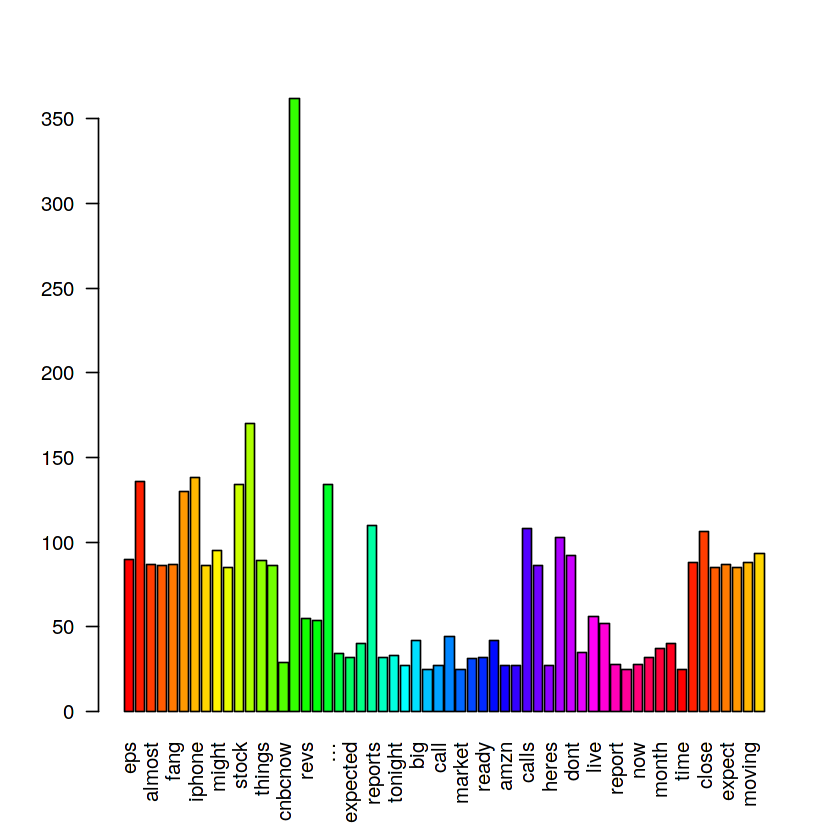

In [43]:
barplot(w, las = 2, col = rainbow(50))

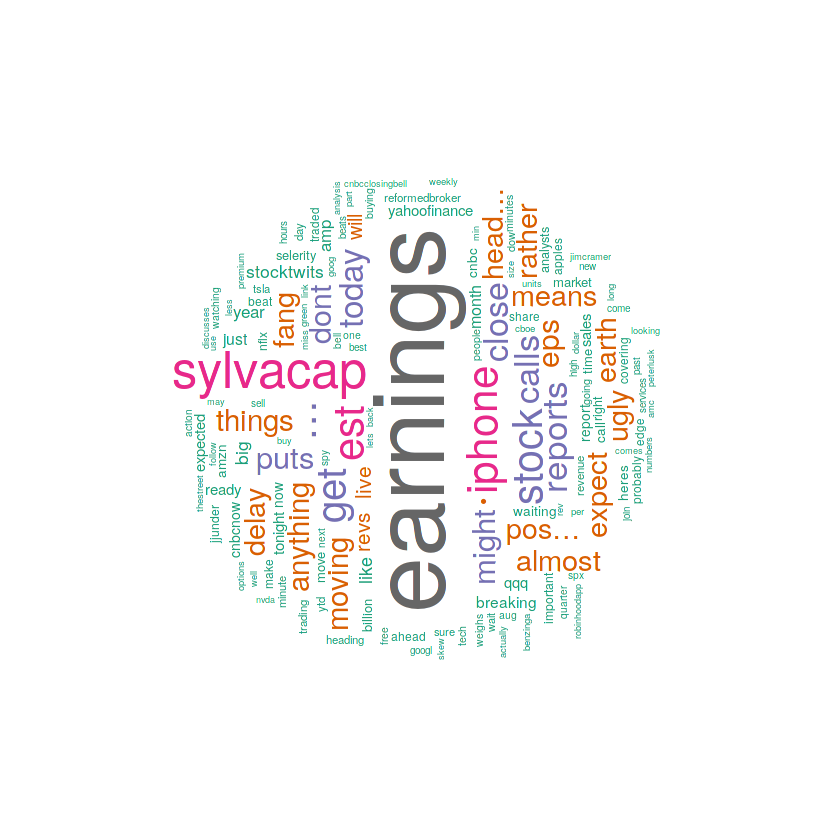

In [49]:
# Word cloud

library(wordcloud)

w = sort(rowSums(tdm), decreasing = TRUE)

set.seed(222)

wordcloud(words = names(w), freq = w, max.words = 150, random.order = F, min.freq = 5,
         colors = brewer.pal(8, 'Dark2'), scale = c(5, 0.3), rot.per = 0.7)

In [74]:
# Sentiment Analysis

library(syuzhet)
library(lubridate)
library(ggplot2)
library(scales)
library(reshape2)
library(dplyr)

In [83]:
# Reading files

apple = read.csv("../input/apple-tweets-before-after-quarterly-earnings/apple_before.csv", header = T)

tweets = iconv(apple$text, to = 'utf-8')

head(tweets)

[1] "RT @option_snipper: $AAPL beat on both eps and revenues. SEES 4Q REV. $49B-$52B, EST. $49.1B https://t.co/hfHXqj0IOB"                        
[2] "RT @option_snipper: $AAPL beat on both eps and revenues. SEES 4Q REV. $49B-$52B, EST. $49.1B https://t.co/hfHXqj0IOB"                        
[3] "Let's see this break all timers. $AAPL 156.89"                                                                                               
[4] "RT @SylvaCap: Things might get ugly for $aapl with the iphone delay. With $aapl down that means almost all of the FANG stocks were down pos…"
[5] "$AAPL - wow! This was supposed to be a throw-away quarter and AAPL beats by over 500 million in revenue! Trillion dollar company by 2018!"   
[6] "RT @CNBCnow: EARNINGS: Apple Q3 EPS $1.67 vs. $1.57 Est.; Q3 Revs. $45.4B vs. $44.89B Est. • $AAPL https://t.co/UzI8Uh9GJI https://t.co/WzX…"

In [84]:
# Obtaining sentiment scores

s = get_nrc_sentiment(tweets)

In [85]:
head(s)

,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,negative,positive
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,0,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,1,0,0,0
4,1,0,2,2,0,1,0,0,3,0
5,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0


In [87]:
tweets[4]

[1] "RT @SylvaCap: Things might get ugly for $aapl with the iphone delay. With $aapl down that means almost all of the FANG stocks were down pos…"

In [91]:
get_nrc_sentiment('ugly')
get_nrc_sentiment('delay')

anger,anticipation,disgust,fear,joy,sadness,surprise,trust,negative,positive
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,1,0,0,0,0,0,1,0


anger,anticipation,disgust,fear,joy,sadness,surprise,trust,negative,positive
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,0,1,1,0,1,0,0,1,0


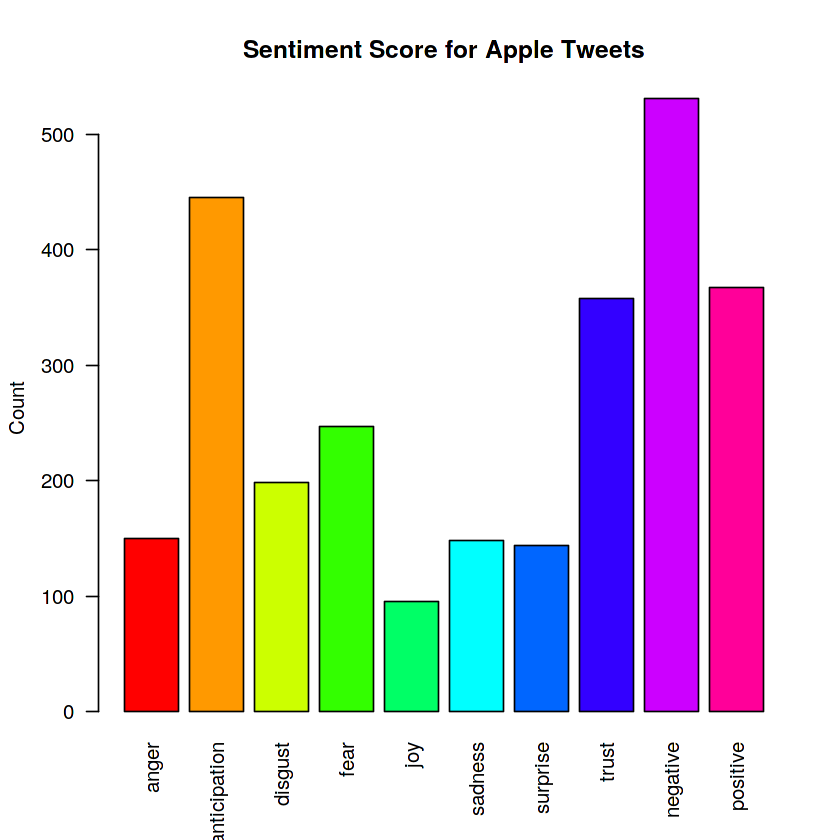

In [92]:
barplot(colSums(s), las= 2, col = rainbow(10), ylab = 'Count',
       main = 'Sentiment Score for Apple Tweets')

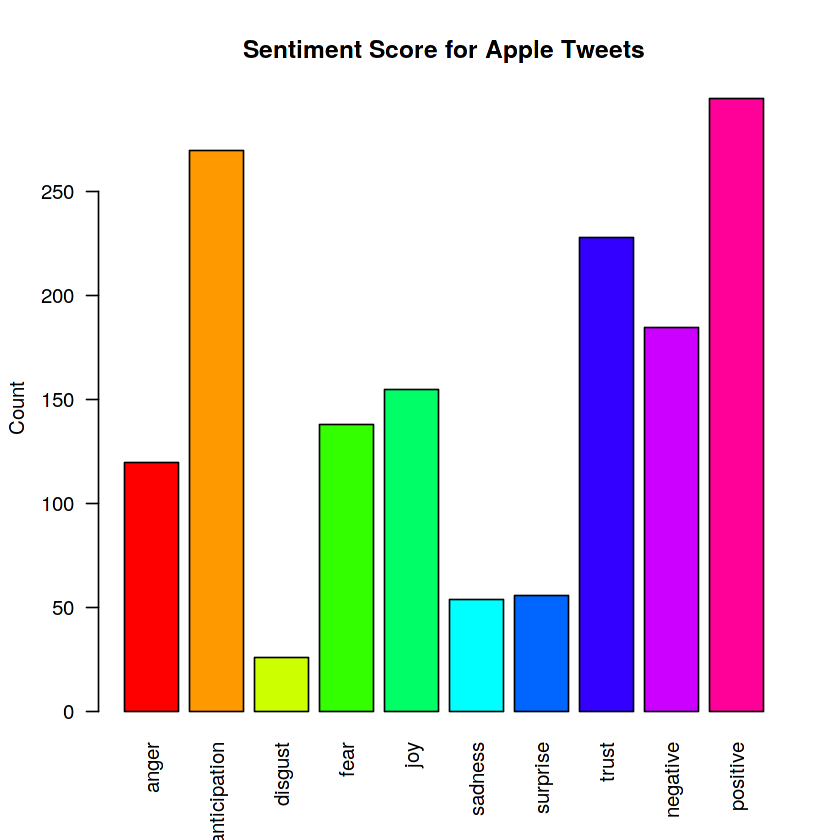

In [93]:
# Reading files

apple = read.csv("../input/apple-tweets-before-after-quarterly-earnings/apple_after.csv", header = T)

tweets = iconv(apple$text, to = 'utf-8')

# Obtaining sentiment scores

s = get_nrc_sentiment(tweets)

barplot(colSums(s), las= 2, col = rainbow(10), ylab = 'Count',
       main = 'Sentiment Score for Apple Tweets')

**We now see that after the sales of apple product the sentiment has changed from negative to positive.**
